In [1]:
%matplotlib qt
import os
import pickle
from sdypy import EMA
import numpy as np
import matplotlib.pyplot as plt 
from EMA_functions import *
from DIC_functions import *
import pandas as pd
import matplotlib.animation as animation
import matplotlib.cm as cm
import matplotlib.colors as col
import ast
from scipy.ndimage import uniform_filter
from Feature_selecter import *
from pyidi import ROISelect
from matplotlib.path import Path
from sdypy.EMA import stabilization
from sdypy.EMA.pole_picking import SelectPoles

c:\Users\thijsmas\AppData\Local\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [22]:
df = pd.read_csv('H:/My Drive/PHD/HSC/file_descriptions_wlocs.csv')
file_name_basis = 'Full_web_ecc2_new2_Floc18_v'
v_vec = [5]
file_name_vec = [file_name_basis + str(x) for x in v_vec]
file_name_vec_video = [x + '_S01.cihx' for x in file_name_vec]
df_filtered = df[df['filename'].isin(file_name_vec_video)]
df_filtered

test = '2D'
if test == '1D':
    # added_string = '_1d_and_2d_roi3x3'
    # added_string = '_1d_roi1x1'
    added_string = '_1d_roi3x3'
    # added_string = '_1d_roi3x3_test'
    # added_string = '_1d_roi3x3_temp'
    # added_string = '_1d_roi3x3_smoothing3x3'
    # added_string = '_1d_roi5x5'
    # added_string = '_1d_roi5x5_with_smoothing'
    # added_string = '_1d_roi5x3'
    # added_string = '_1d_and_2d_5000_points'
elif test == '2D':
    # added_string = '_1d_and_2d_5000_points'
    added_string = '_1d_and_2d_roi7x7'
    # added_string = '_1d_and_2d_roi9x9'

file_name = file_name_vec_video[0]
file_name_EMAs = os.path.splitext(file_name_vec[0])[0] + added_string
root = 'C:/Users/thijsmas/Documents/GitHub/pyidi_data/EMA structure'
prey_ij = ast.literal_eval(df_filtered['prey_ij'].item())
df_filtered

,filename,path,ecc,loc,mass,taut/loose,impact/pluck,version,n_frames,fps,Oversatured pixels,Undersatured pixels,prey_ij,spider_ij
123,Full_web_ecc2_new2_Floc18_v5_S01.cihx,H:\My Drive\PHD\HSC\ecc2\web1\Full_web_ecc2_ne...,2,18,True,Loose,Impact,5,8000,8000.0,727,18127,"(356, 234)","(553, 229)"


In [24]:
file_name, file_name_EMAs

('Full_web_ecc2_new2_Floc18_v5_S01.cihx',
 'Full_web_ecc2_new2_Floc18_v5_1d_and_2d_roi7x7')

In [3]:
with open(os.path.join(root, file_name_EMAs + '.pkl'), 'rb') as f:
    EMA_structure = pkl.load(f)
video = EMA_structure.open_video()
EMA_structure.open_impact_data()

H:/My Drive/PHD/HSC\ecc2\web1\Full_web_ecc2_new2_Floc18_v5_S01\Full_web_ecc2_new2_Floc18_v5_S01.cihx


c:\Users\thijsmas\AppData\Local\anaconda3\Lib\site-packages\pyMRAW.py:103: UserWarning: Clipped footage! (Total frame: 8000, Original total frame: 87371)
  warnings.warn('Clipped footage! (Total frame: {}, Original total frame: {})'.format(cih['Total Frame'], cih['Original Total Frame'] ))


In [4]:
video.info

{'Date': '2023/9/22',
 'Camera Type': 'FASTCAM SA-Z type 2100K-M-64GB',
 'Record Rate(fps)': 8000.0,
 'Shutter Speed(s)': 8104.0,
 'Total Frame': 8000,
 'Original Total Frame': 87371,
 'Image Width': 1024,
 'Image Height': 512,
 'File Format': 'Mraw',
 'EffectiveBit Depth': 12,
 'EffectiveBit Side': 'Higher',
 'Color Bit': 16,
 'Comment Text': ''}

In [5]:
name_video =  'Full_web_ecc2_new2_Floc18_v5_S01.cihx'
root_video = 'H:/My Drive/PHD/HSC/ecc2/Web1/Full_web_ecc2_new2_Floc18_v5_S01'
file_path = os.path.join(root_video, name_video)
DIC_structure = DIC_Structure(file_path)

df = DIC_structure.list_test_data(max_d = 6, max_dd = 0.5,  max_drift = 1.5, d_min=False, test_range = range(10,65), robostness_check = False)
df

Available filter methods: eig0, eig1, harris, trigs, harmonic_mean, eig_theta, eig_theta_off, eig0_test, eig1_test


,cih_file,test_number,createdate,method,roi_size,n_points,n_tracked_points,success_rate,dyx,smoothing_size
0,H:/My Drive/PHD/HSC\ecc2\web1\Full_web_ecc2_ne...,10,2024 04 17 20:26:06,lk,"[11, 11]",None,None,None,None,None
1,H:/My Drive/PHD/HSC\ecc2\web1\Full_web_ecc2_ne...,11,2024 04 17 20:56:38,lk,"[13, 13]",None,None,None,None,None
2,H:/My Drive/PHD/HSC\ecc2\web1\Full_web_ecc2_ne...,12,2024 04 17 21:27:29,lk,"[15, 15]",None,None,None,None,None
3,H:/My Drive/PHD/HSC\ecc2\web1\Full_web_ecc2_ne...,13,2024 04 17 22:14:08,lk_1D,"[5, 5]",None,None,None,"[1, 0]",None
4,H:/My Drive/PHD/HSC\ecc2\web1\Full_web_ecc2_ne...,14,2024 04 17 22:57:01,lk_1D,"[7, 7]",None,None,None,"[1, 0]",None
5,H:/My Drive/PHD/HSC\ecc2\web1\Full_web_ecc2_ne...,15,2024 04 17 23:34:59,lk_1D,"[9, 9]",None,None,None,"[1, 0]",None
6,H:/My Drive/PHD/HSC\ecc2\web1\Full_web_ecc2_ne...,16,2024 04 18 00:15:47,lk_1D,"[11, 11]",None,None,None,"[1, 0]",None
7,H:/My Drive/PHD/HSC\ecc2\web1\Full_web_ecc2_ne...,17,2024 04 18 00:56:58,lk_1D,"[13, 13]",None,None,None,"[1, 0]",None
8,H:/My Drive/PHD/HSC\ecc2\web1\Full_web_ecc2_ne...,18,2024 04 18 01:34:48,lk_1D,"[15, 15]",None,None,None,"[1, 0]",None
9,H:/My Drive/PHD/HSC\ecc2\web1\Full_web_ecc2_ne...,19,2024 04 18 19:45:48,lk,"[5, 5]",None,None,None,None,None


Switch between 1D and 2D here!

In [6]:
# if test == '1D':
#     EMA_structure.tp = EMA_structure.maxima1d
#     EMA_structure.d  = EMA_structure.displacements1D_1Dpoints
#     td = EMA_structure.d +  EMA_structure.maxima1d.reshape(len(EMA_structure.maxima1d),1,2)
# elif test == '2D':
#     EMA_structure.tp = EMA_structure.maxima2d 
#     EMA_structure.d  = EMA_structure.displacements2D_2Dpoints
#     td = EMA_structure.d +  EMA_structure.maxima2d.reshape(len(EMA_structure.maxima2d),1,2)
# test_number = 16      # 1d 11x11 5812 points
# test_number = 10      # 2d 11x11 2335 points
test_number = 15      # 1d 9x9 5339 points
# test_number = 21        # 2d 9x9 1532 points
# test_number = 63
# test_number = 64
row = df[df["test_number"] == test_number]

EMA_structure.tp, EMA_structure.d = DIC_structure.join_results([test_number])
td = EMA_structure.d +  EMA_structure.tp.reshape(len(EMA_structure.tp),1,2)
test = row['method'].values[0]
roi_size = tuple(row['roi_size'].values[0])
test, roi_size

('lk_1D', (9, 9))

In [7]:
%matplotlib qt
# prey_ij = 662, 419
prey_ij = 358, 236
peak_n = 4
sequential_image_n = 0
shift = 5
EMA_structure.nut_idx((prey_ij[0]-shift, prey_ij[1]+shift), exclude_high_amplitude = False, d_lim =25)
fig, ax = EMA_structure.plot_still_frame(video, sequential_image_n, show_saturation = False, tp_nut = True, tp = True, valid_only=False)
# fig.savefig(os.path.join(EMA_structure.root_simulations, 'tracking dots', f'Mode_shapes_flat_{EMA_structure.file_name}'+added_string+'.png'), dpi=300, bbox_inches='tight')

In [8]:
%matplotlib qt
ani = EMA_structure.play_video(video, range(300,video.N-1), interval=100, points=td)

(-5.0, 5.0)

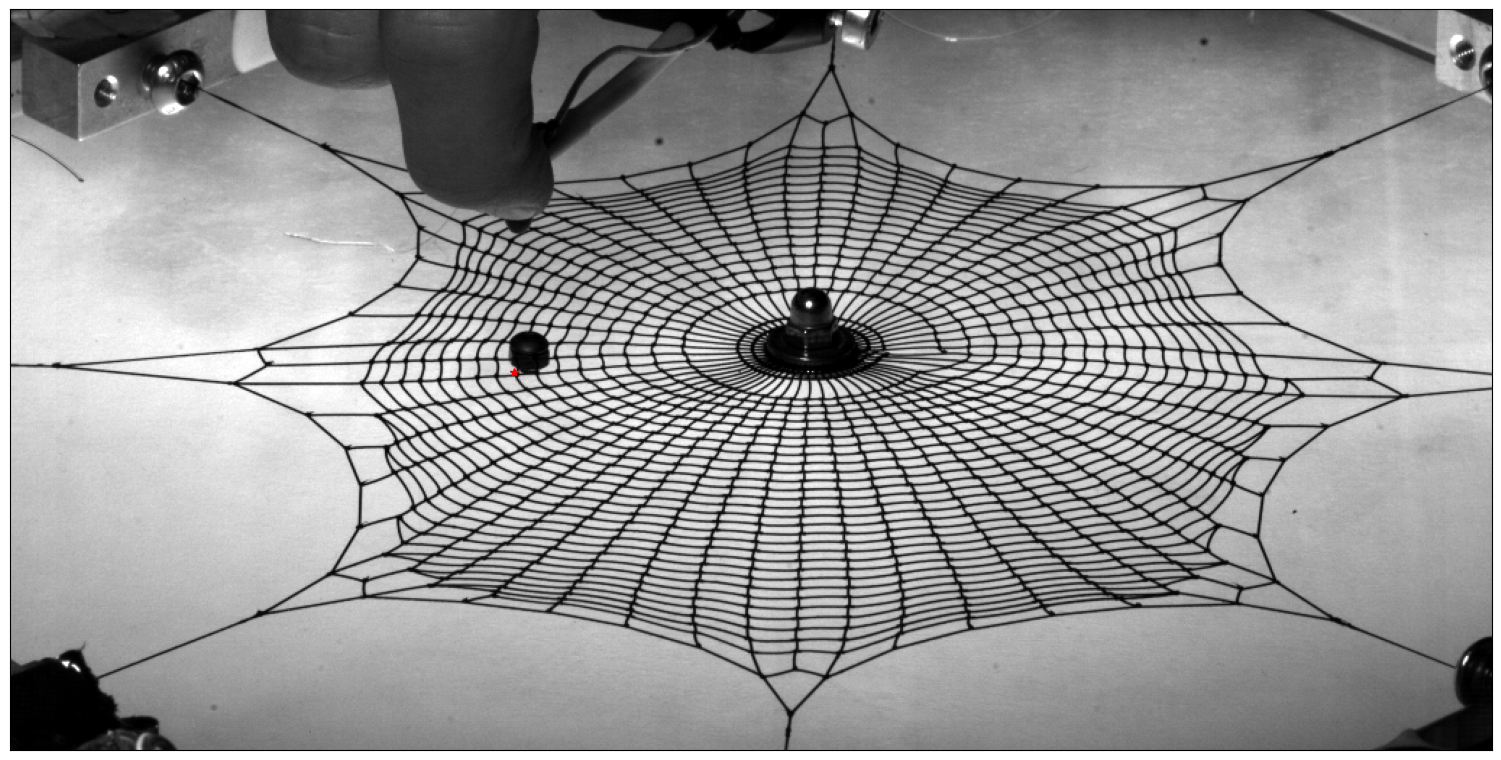

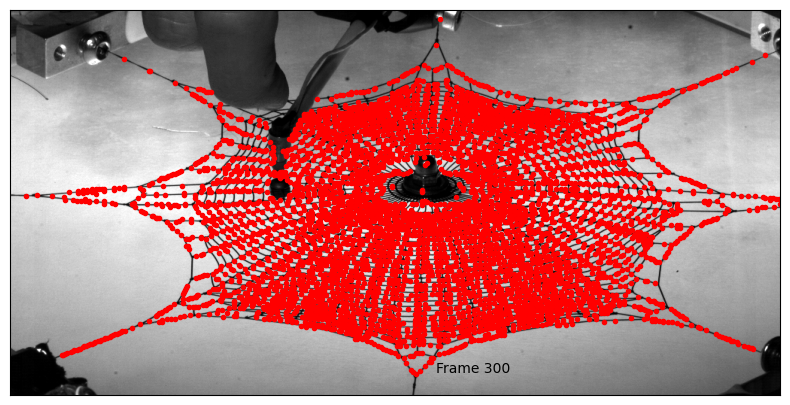

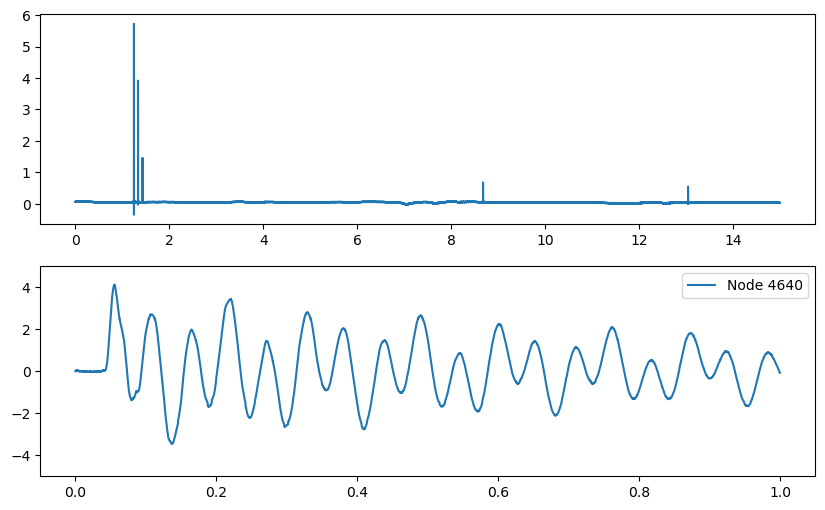

In [9]:
%matplotlib inline
EMA_structure.initialize_signals()
# EMA_structure.initialize_displacement(idx='all', dir='y')
EMA_structure.initialize_displacement(idx='all', dir='xy')
EMA_structure.t_camera_raw = EMA_structure.t_camera_raw
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
ax[0].plot(EMA_structure.t_force_raw, EMA_structure.force_raw)
# EMA_structure.nearest_nut_index = 120
for node in [EMA_structure.nearest_nut_index]: # range(121,130):   #
    ax[1].plot(EMA_structure.t_camera_raw, EMA_structure.displacements_raw[node,:,0], label=f'Node {node}')
ax[1].legend()
ax[1].set_ylim(-5,5)


In [10]:
# first_zero_id_cam = EMA_structure.find_signal_start(EMA_structure.displacements_raw[EMA_structure.nearest_nut_index], treshold=0.08, approximate_height = .5)
first_zero_id_cam = EMA_structure.find_signal_start(EMA_structure.displacements_raw[EMA_structure.nearest_nut_index,:,0], treshold=0.08, approximate_height = .5)
first_zero_id_force = EMA_structure.find_signal_start(EMA_structure.force_raw, peak_n=peak_n, treshold=0.05)
zeros_camera    = EMA_structure.greatest_common_divisor(EMA_structure.fs_camera, EMA_structure.fs_force)
zeros_force     = EMA_structure.n_samples_camera_to_force(zeros_camera)

# Shift and align signals
EMA_structure.t_camera = EMA_structure.shift_time(EMA_structure.t_camera_raw, EMA_structure.t_camera_raw[first_zero_id_cam-zeros_camera])
EMA_structure.t_force = EMA_structure.shift_time(EMA_structure.t_force_raw, EMA_structure.t_force_raw[first_zero_id_force-zeros_force])

# Clip signals
EMA_structure.t_camera          = EMA_structure.clip_signal_before(EMA_structure.t_camera,first_zero_id_cam-zeros_camera)
# EMA_structure.displacements     = EMA_structure.clip_signal_before(EMA_structure.displacements_raw, first_zero_id_cam-zeros_camera)
EMA_structure.displacements_x     = EMA_structure.clip_signal_before(EMA_structure.displacements_raw[:,:,1], first_zero_id_cam-zeros_camera)
EMA_structure.displacements_y     = EMA_structure.clip_signal_before(EMA_structure.displacements_raw[:,:,0], first_zero_id_cam-zeros_camera)
EMA_structure.t_force           = EMA_structure.clip_signal_before(EMA_structure.t_force, first_zero_id_force-zeros_force)
EMA_structure.force             = EMA_structure.clip_signal_before(EMA_structure.force_raw, first_zero_id_force-zeros_force)

last_id_force, last_id_camera   = EMA_structure.find_last_common_time_ids(EMA_structure.t_camera, EMA_structure.t_force)
EMA_structure.t_camera          = EMA_structure.clip_signal_after(EMA_structure.t_camera, last_id_camera)
# EMA_structure.displacements     = EMA_structure.clip_signal_after(EMA_structure.displacements, last_id_camera)
EMA_structure.displacements_x     = EMA_structure.clip_signal_after(EMA_structure.displacements_x, last_id_camera)
EMA_structure.displacements_y     = EMA_structure.clip_signal_after(EMA_structure.displacements_y, last_id_camera)
EMA_structure.t_force           = EMA_structure.clip_signal_after(EMA_structure.t_force, last_id_force)
EMA_structure.force             = EMA_structure.clip_signal_after(EMA_structure.force, last_id_force)

# Zero Force after impact
EMA_structure.force = EMA_structure.zero_signal_treshold(EMA_structure.force, 0.1)

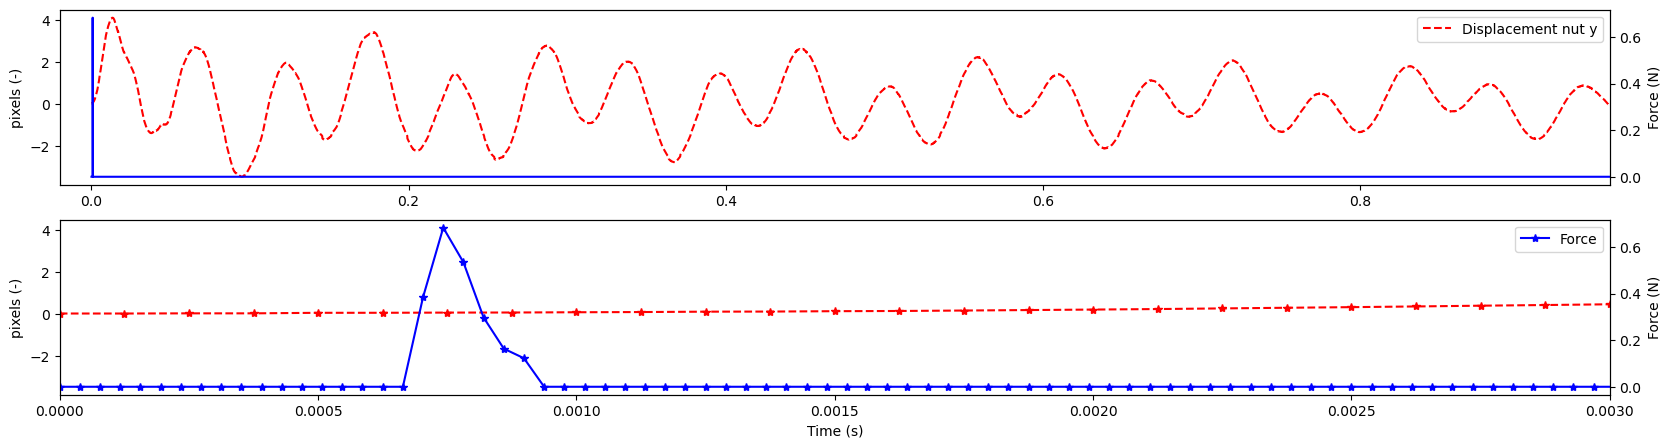

In [11]:
%matplotlib inline
fig, ax = plt.subplots(2,1,figsize=(20,5))
ax0_2 = ax[0].twinx()
ax1_2 = ax[1].twinx()
ax0_2.plot(EMA_structure.t_force, EMA_structure.force,'b-', label='Force (raw))')
# ax[0].plot(EMA_structure.t_camera, EMA_structure.displacements[EMA_structure.nearest_nut_index,:],'r--', label=f'Displacement nut')
# ax[0].plot(EMA_structure.t_camera, EMA_structure.displacements_x[EMA_structure.nearest_nut_index,:],'r--', label=f'Displacement nut x')
ax[0].plot(EMA_structure.t_camera, EMA_structure.displacements_y[EMA_structure.nearest_nut_index,:],'r--', label=f'Displacement nut y')
ax[0].set_xlim([-0.02, EMA_structure.t_camera[-1]])

ax[0].set_ylabel('pixels (-)')
ax0_2.set_ylabel('Force (N)')
ax[0].legend(loc='upper right')


ax1_2.plot(EMA_structure.t_force, EMA_structure.force,'b*-', label='Force')
# ax[1].plot(EMA_structure.t_camera, EMA_structure.displacements[EMA_structure.nearest_nut_index,:],'r*--', label=f'Displacement nut')
# ax[1].plot(EMA_structure.t_camera, EMA_structure.displacements_x[EMA_structure.nearest_nut_index,:],'r*--', label=f'Displacement nut x')
ax[1].plot(EMA_structure.t_camera, EMA_structure.displacements_y[EMA_structure.nearest_nut_index,:],'r*--', label=f'Displacement nut y')
# ax[1].plot(t_camera2[disp_peaks], disp_nut[disp_peaks], 'rx')
ax[1].set_xlim([0, 0.003])
ax[1].set_ylabel('pixels (-)')
ax1_2.set_ylabel('Force (N)')

# set legend to north east
ax1_2.legend()
ax[1].set_xlabel('Time (s)')
plt.show()
fig.savefig(os.path.join(EMA_structure.root_simulations, 'signals', f'{EMA_structure.file_name} - example impact.png'), dpi=300, bbox_inches='tight')

Apply exponential window to displacement signal

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


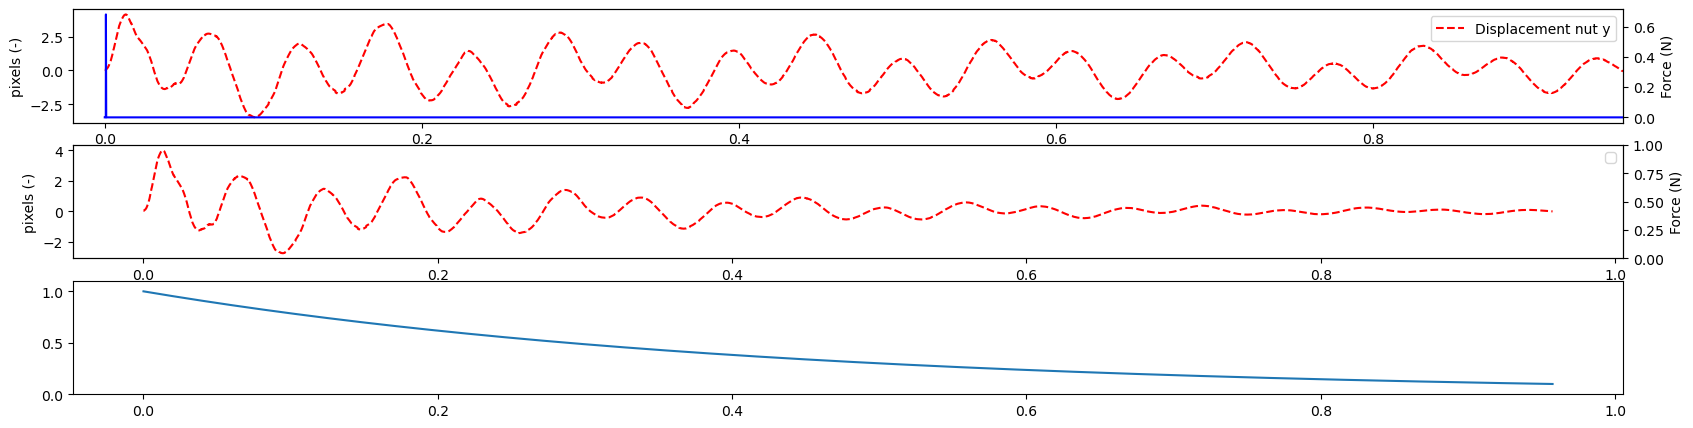

0.10000000000000002

In [12]:
time_windows = np.linspace(0, 1, len(EMA_structure.t_camera))
exponential_w = np.exp(np.log(0.1) * time_windows)


%matplotlib inline
fig, ax = plt.subplots(3,1,figsize=(20,5))
ax0_2 = ax[0].twinx()
ax1_2 = ax[1].twinx()
ax0_2.plot(EMA_structure.t_force, EMA_structure.force,'b-', label='Force (raw))')
ax[0].plot(EMA_structure.t_camera, EMA_structure.displacements_y[EMA_structure.nearest_nut_index,:],'r--', label=f'Displacement nut y')
ax[0].set_xlim([-0.02, EMA_structure.t_camera[-1]])

ax[0].set_ylabel('pixels (-)')
ax0_2.set_ylabel('Force (N)')
ax[0].legend(loc='upper right')

EMA_structure.displacements_x = EMA_structure.displacements_x*exponential_w
EMA_structure.displacements_y = EMA_structure.displacements_y*exponential_w


ax[1].plot(EMA_structure.t_camera, EMA_structure.displacements_y[EMA_structure.nearest_nut_index,:],'r--', label=f'Displacement nut y')

ax[1].set_ylabel('pixels (-)')
ax1_2.set_ylabel('Force (N)')

# set legend to north east
ax1_2.legend()
ax[1].set_xlabel('Time (s)')

ax[2].plot(EMA_structure.t_camera, exponential_w)
ax[2].set_ylim(0,1.1)
plt.show()
# fig.savefig(os.path.join(EMA_structure.root_simulations, 'signals', f'{EMA_structure.file_name} - exponential window.png'), dpi=300, bbox_inches='tight')
exponential_w[-1]

In [13]:

# import numpy as np
# from matplotlib.path import Path
# roi_select = ROISelect(video)
# roi_select.polygon
# polygon2 = np.array(roi_select.polygon)
polygon_new = np.polygon = np.array([[  11,   39,   65,  107,   80,   54,   57,   63,  113,  153,  213,
         234,  245,  265,  289,  318,  359,  401,  445,  461,  426,  427,
         448,  482,  510,  509,  461,  429,  416,  416,  427,  464,  465,
         457,  413,  374,  319,  290,  272,  260,  254,  239,  227,  187,
         171,  150,  131,   98,   63,   53,   88,  102,  106,  120,  131,
         134,  137,  143,  142,  132,  116,  110,   87,   65,   13,   11],
       [ 572,  576,  591,  775,  923,  985, 1002, 1010,  924,  862,  903,
         954, 1023, 1023,  920,  887,  876,  906, 1001,  995,  872,  718,
         631,  564,  542,  533,  496,  399,  304,  238,  179,   72,   63,
          58,  162,  214,  215,  187,  145,   61,   16,   19,  165,  256,
         276,  275,  263,  206,  135,  142,  228,  268,  276,  283,  297,
         319,  332,  342,  358,  369,  372,  422,  507,  543,  562,  572]])

polygon2 = np.array([[ 92, 144, 167, 179, 226, 225, 177, 135, 104,  92],
       [251, 263, 306, 336, 345, 367, 378, 403, 421, 251]])

path2 = Path(polygon2.T)
path = Path(polygon_new.T)

inside_polygon = path.contains_points(EMA_structure.tp)

np.sum(~inside_polygon)

0

In [14]:
polygon2

array([[ 92, 144, 167, 179, 226, 225, 177, 135, 104,  92],
       [251, 263, 306, 336, 345, 367, 378, 403, 421, 251]])

In [17]:
%matplotlib qt
# Feature filtering parameters for the 2D signals
# d_lim = 10
# z_limit = 0.2
# d_min = 0.9
# f_range = (3, 50)
# H_max_lim = 2e6
# H_peak_min = 2
# smooth_lim = 500
# max_drift = 1.

# Feature filtering parameters for the 1D signals
d_lim = 6
z_limit = 10
d_min = 0.1
f_range = (3, 50)
H_max_lim = 1e6
H_peak_min = 3
smooth_lim = 1
max_drift = 2   
max_end_drift = 1.5

EMA_structure.set_freq_properties(padding_ratio=3)
EMA_structure.get_transfer_function(direction='y')
# EMA_structure.valid_tp(d_lim = 15, z_limit = 0.02, h_type = 'H1')
EMA_structure.valid_tp(d_lim = d_lim, z_limit = z_limit, h_type = 'H1', d_min=d_min, f_range= f_range)

smooth_signals = np.max(np.abs(np.diff(np.linalg.norm(EMA_structure.d, axis=2))), axis = 1) < smooth_lim
# non_drifting = np.abs(np.mean(np.linalg.norm(EMA_structure.d, axis=2), axis=1) < max_drift)
non_drifting = np.abs(np.mean(np.linalg.norm(EMA_structure.d[:,:-100], axis=2), axis=1) < max_drift)
non_drifting2 = np.abs(np.linalg.norm(EMA_structure.d[:,-1], axis=1)) < max_end_drift
H_max = np.max(np.abs(EMA_structure.H1), axis=1)
H_low = H_max<H_max_lim
H_peak_loc = np.argmax(np.abs(EMA_structure.H1), axis=1)
sd_points = H_peak_loc>H_peak_min

EMA_structure.valid_tps = EMA_structure.valid_tps  & smooth_signals & non_drifting & non_drifting2 #& sd_points & inside_polygon#& H_low
# EMA_structure.valid_tps =  smooth_signals & H_low & non_drifting & EMA_structure.valid_tps & sd_points# & non_drifting & H_low &

print(np.sum(~EMA_structure.exclude_outliers))
print(f'Number of valid points is: {len(EMA_structure.tp[EMA_structure.valid_tps])}/{EMA_structure.tp.shape[0]}')
ani = EMA_structure.play_video(video, range(300,video.N - 1), interval=30, points=td[EMA_structure.valid_tps])

# plt.figure(figsize=(15, 5))
# plt.semilogy(EMA_structure.freq_force, np.abs(EMA_structure.force_fft), label='Force')
# plt.semilogy(EMA_structure.freq_camera, np.abs(EMA_structure.disp_fft[EMA_structure.nearest_nut_index]), label='Displacement')

# plt.semilogy(freq_camera, np.abs(Disp[tp_id])/ np.abs(Force), label='output/input')
# plt.semilogy(freq_camera, np.abs(Disp[nearest_index]), label='Displacement nut')
# plt.plot(EMA_structure.freq_camera[], np.abs(EMA_structure.H1[EMA_structure.valid_tps[0]]), 'r', label='H1')
# for H1_i, peak_loc in zip(EMA_structure.H1[EMA_structure.valid_tps], H_peak_loc[EMA_structure.valid_tps]):
#     plt.semilogy(EMA_structure.freq_force, np.abs(H1_i), 'r', alpha=0.1, linewidth=0.2)
#     plt.semilogy(EMA_structure.freq_force[peak_loc], np.abs(H1_i[peak_loc]), 'ko', alpha=0.3)


# plt.xlim(f_range)
# plt.xlabel('Frequency [Hz]')
# plt.ylabel('Force [N], Displacment [m] amplitude spectra')
# plt.legend()

# coh = np.mean(np.abs(EMA_structure.H1[EMA_structure.valid_tps] / EMA_structure.H2[EMA_structure.valid_tps]), axis=0)
print(np.sum(~smooth_signals), np.sum(~non_drifting), np.sum(~non_drifting2), np.sum(~sd_points), np.sum(~H_low), np.sum(~EMA_structure.valid_tps))
# EMA_structure.get_transfer_function(direction='x')
# fig, ax = plt.subplots(1, 1, figsize=(15, 5))
# for disp_i in EMA_structure.d[EMA_structure.valid_tps, :, 0]:
#     ax.plot(EMA_structure.t_camera_raw, disp_i, 'r', alpha=0.2, linewidth=0.2)
# ax.plot(EMA_structure.t_camera, np.mean(EMA_structure.displacements[EMA_structure.valid_tps], axis=0), 'k', label='Mean displacement')

1
Number of valid points is: 5340/5400
60 58 58 130 9 60


In [18]:
%matplotlib qt
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18
if test == '1D' or test == 'lk_1D':
    # roi_size = (11,11)
    Gi, Gj = np.gradient(EMA_structure.mean_image)
    s = np.array([1,0])
    Gs  = np.abs(s[0]*Gi + s[1]*Gj)
    filtered_image = uniform_filter(Gs, size=roi_size)
    score_list = filtered_image[EMA_structure.tp[:, 0], EMA_structure.tp[:, 1]]
elif test == '2D' or test == 'lk':
    # roi_size = (7,7)
    feature_selecter = FeatureSelecter(EMA_structure.mean_image)
    feature_selecter.set_filter_method('eig0', roi_size)
    filtered_image = feature_selecter.apply_filter(downsample=1)
    score_list = filtered_image[EMA_structure.tp[:, 0], EMA_structure.tp[:, 1]]

# indices = np.argsort(score_list)
# high_scoring = np.ones(score_list.shape, dtype=bool)
# high_scoring[indices[:1700]] = False

# tp = EMA_structure.tp[high_scoring]
# valid_tps = EMA_structure.valid_tps[high_scoring]

fig, ax = plt.subplots(1, 1, figsize=(15, 7.5))
fig.set_tight_layout(True)
ax.imshow(EMA_structure.mean_image, cmap='gray')
# ax.scatter(EMA_structure.tp[EMA_structure.valid_tps, 1], EMA_structure.tp[EMA_structure.valid_tps, 0], marker='o',s=10, c=score_list[EMA_structure.valid_tps], cmap='RdYlGn')
# ax.scatter(EMA_structure.tp[~EMA_structure.valid_tps, 1], EMA_structure.tp[~EMA_structure.valid_tps, 0], marker='x',s=2, c=score_list[~EMA_structure.valid_tps], cmap='RdYlGn')
ax.scatter(EMA_structure.tp[EMA_structure.valid_tps, 1], EMA_structure.tp[EMA_structure.valid_tps, 0], marker='o',s=10, c='g', label='Automatically selected points (successfull tracking)')
ax.scatter(EMA_structure.tp[~EMA_structure.valid_tps, 1], EMA_structure.tp[~EMA_structure.valid_tps, 0], marker='x',s=10, c='r', label='Automatically selected points (unsuccessfull tracking)')
# ax.scatter(tp[valid_tps, 1], tp[valid_tps, 0], marker='o',s=10, c='g', label='Automatically selected points (successfull tracking)')
# ax.scatter(tp[~valid_tps, 1], tp[~valid_tps, 0], marker='x',s=10, c='r', label='Automatically selected points (unsuccessfull tracking)')
ax.plot(polygon_new[1], polygon_new[0], color='y', lw=2, label='Region of interest')
ax.plot(polygon2[1], polygon2[0], color='b', lw=1, label='Obstructed view')
ax.set_xticks([])
ax.set_yticks([])
# plt.savefig(os.path.join(EMA_structure.root_cam, f'{EMA_structure.file_name}_{test}_roi{roi_size[0]}x{roi_size[1]}_no_legend_wov.png'), dpi=300)
legend = ax.legend(loc='upper right')
legend.get_frame().set_alpha(1)
# plt.savefig(os.path.join(EMA_structure.root_cam, f'{EMA_structure.file_name}_{test}_roi{roi_size[0]}x{roi_size[1]}_wov.png'), dpi=300)
# print(f'Number of valid points is: {len(tp[valid_tps])}/{tp.shape[0]}')

C:\Users\thijsmas\AppData\Local\Temp\ipykernel_32020\3050213769.py:26: PendingDeprecationWarning: The set_tight_layout function will be deprecated in a future version. Use set_layout_engine instead.
  fig.set_tight_layout(True)


In [19]:
# inside obstructed view
invalid_inside_obstructed_view = ~path2.contains_points(EMA_structure.tp[~EMA_structure.valid_tps])
all_outside_obstructed_view = ~path2.contains_points(EMA_structure.tp)
print(f'Number of valid points is: {len(EMA_structure.tp[EMA_structure.valid_tps])}/{EMA_structure.tp.shape[0]}')
# invalid_inside_obstructed_view = ~path2.contains_points(tp[~valid_tps])
# all_outside_obstructed_view = ~path2.contains_points(tp)
# print(f'Number of valid points is: {len(tp[valid_tps])}/{tp.shape[0]}')
invalid_inside_obstructed_view.sum(), all_outside_obstructed_view.sum()

Number of valid points is: 5340/5400


(0, 5292)

In [20]:
%matplotlib qt
# large_x_motion = np.max(EMA_structure.d[EMA_structure.valid_tps, :, 1], axis=1)>.5
ani = EMA_structure.play_video(video, range(300,video.N - 1), interval=30, points=td[EMA_structure.valid_tps])

In [18]:
# smooth_signals2 = np.max(np.abs(np.diff(np.linalg.norm(EMA_structure.d, axis=2))), axis = 1) < 15
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
for disp_i in EMA_structure.d[EMA_structure.valid_tps, :, 0]:
    ax.plot(EMA_structure.t_camera_raw, disp_i, 'r', alpha=0.5, linewidth=0.5)
ax.set_ylim([-7, 7])
# ax.set_xlim([0.1, 0.2])

(-7.0, 7.0)

In [ ]:
# import sdynpy as sdpy
# frf_sampled = sdpy.TransferFunctionArray.from_time_data(
#     references_sampled,responses_sampled)
# pm = sdpy.PolyMax_GUI()


In [21]:
cam = EMA.Model(EMA_structure.H1[EMA_structure.valid_tps], EMA_structure.freq_camera, lower=5, upper=300, pol_order_high=150, frf_type = 'receptance')
cam.get_poles(show_progress=True)
# cam.Select_poles.chart_type = 1
cam.select_poles()


100%|█████████████████████████████████████████████████████████████| 150/150 [00:04<00:00, 36.07it/s]


In [ ]:
cam.select_poles()

In [24]:
# if test == '1D':
#     EMA_structure.tp = EMA_structure.maxima1d
#     EMA_structure.d  = EMA_structure.displacements1D_1Dpoints
#     td = EMA_structure.d +  EMA_structure.maxima1d.reshape(len(EMA_structure.maxima1d),1,2)
# elif test == '2D':
#     EMA_structure.tp = EMA_structure.maxima2d 
#     EMA_structure.d  = EMA_structure.displacements2D_2Dpoints
#     td = EMA_structure.d +  EMA_structure.maxima2d.reshape(len(EMA_structure.maxima2d),1,2)
# test_number = 16      # 1d 11x11 5812 points
# test_number = 10      # 2d 11x11 2335 points
test_number = 15      # 1d 9x9 5339 points
# test_number = 21        # 2d 9x9 1532 points
# test_number = 63  
row = df[df["test_number"] == test_number]

EMA_structure.tp, EMA_structure.d = DIC_structure.join_results([test_number])
td = EMA_structure.d +  EMA_structure.tp.reshape(len(EMA_structure.tp),1,2)
test = row['method'].values[0]
roi_size = tuple(row['roi_size'].values[0])
test, roi_size

('lk_1D', (9, 9))

In [ ]:
with open(os.path.join(EMA_structure.root_simulations,'EMA models', f'{EMA_structure.file_name}_{test}_roi{roi_size[0]}x{roi_size[1]}_cam.pkl'), 'wb') as f:
    pkl.dump(cam, f)

In [25]:
with open(os.path.join(EMA_structure.root_simulations,'EMA models', f'{EMA_structure.file_name}_{test}_roi{roi_size[0]}x{roi_size[1]}_cam.pkl'), 'rb') as f:
    cam_1d = pkl.load(f)

In [26]:
fn_temp_2d=0.001
xi_temp_2d=0.05
fn_temp_2d, xi_temp_2d, test_fn_2d, test_xi_2d = stabilization._stabilization(
            cam_2d.all_poles, cam_2d.pol_order_high, err_fn=fn_temp_2d, err_xi=xi_temp_2d)
b_2d = np.argwhere((test_fn_2d > 0) & ((test_xi_2d > 0) & (xi_temp_2d > 0)) & (fn_temp_2d > 0))
frf_mean_2d = np.mean(np.abs(cam_2d.frf), axis=0)
pole_region_2d = np.where(1+b_2d[:, 1] > 120)

100%|█████████████████████████████████████████████████████████████| 150/150 [00:04<00:00, 36.80it/s]


In [27]:
fn_temp_1d=0.001
xi_temp_1d=0.05
fn_temp_1d, xi_temp_1d, test_fn_1d, test_xi_1d = stabilization._stabilization(
            cam_1d.all_poles, cam_1d.pol_order_high, err_fn=fn_temp_1d, err_xi=xi_temp_1d)
b_1d = np.argwhere((test_fn_1d > 0) & ((test_xi_1d > 0) & (xi_temp_1d > 0)) & (fn_temp_1d > 0))
frf_mean_1d = np.mean(np.abs(cam_1d.frf), axis=0)
pole_region_1d = np.where(1+b_1d[:, 1] > 120)

100%|█████████████████████████████████████████████████████████████| 150/150 [00:04<00:00, 36.56it/s]


In [73]:
from collections import OrderedDict
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
fig, ax2 = plt.subplots(1, 1, figsize=(12, 5))
ax1 = ax2.twinx()
ax2.semilogy(cam_2d.freq, frf_mean_2d, 'r-', label = 'Mean FRF (conventional DIC)')
ax1.plot(fn_temp_2d[b_2d[pole_region_2d, 0], b_2d[pole_region_2d, 1]], 1+b_2d[pole_region_2d, 1], 'rx', markersize=7, label="Stable poles (conventional DIC)")
ax2.semilogy(cam_1d.freq, frf_mean_1d, 'k-', label = 'Mean FRF (Directional DIC)')
ax1.plot(fn_temp_1d[b_1d[pole_region_1d, 0], b_1d[pole_region_1d, 1]], 1+b_1d[pole_region_1d, 1], 'ko', markersize=3, label="Stable poles (Directional DIC)")
fn = [82, 137.2, 139.6, 187.8, 191, 197, 199.5, 202, 242]
x_list = []
y_list = []
for fn1 in fn:
    x_list += [fn1, fn1, None]
    y_list += [120, 150, None]
ax1.plot(x_list, y_list, 'g-', lw=5, alpha=.5, label='Poles only detected with Directional DIC')
fn = [7.4, 141.5, 177.5, 191, 214.3, 242]
x_list = []
y_list = []
for fn1 in fn:
    x_list += [fn1, fn1, None]
    y_list += [100, 150, None]
ax1.plot(x_list, y_list, color='lightblue', lw=1)
fn = fn + [50, 100, 150, 200, 250]
fn = np.sort(fn).astype(float)
ax1.set_xticks(fn)
ax1.set_xticklabels(["{:.3g}".format(val) for val in fn])

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

handles = handles1 + handles2
labels = labels1 + labels2
handle_dict = OrderedDict(zip(labels, handles))

label_list = list(handle_dict.keys())
handle_list = list(handle_dict.values())

order = [4,1,3,0, 2]
handles = [handle_list[i] for i in order]
labels = [label_list[i] for i in order]

# Create a dictionary to remove duplicates
legend = ax1.legend(handles, labels, loc = 'lower left', fontsize=12)
# legend = ax1.legend(loc = 'lower left')
legend.get_frame().set_alpha(.9)
ax1.set_xlim([5, 250])
ax1.set_ylim([105, 150])
ax1.set_yticks([120,125, 130,135, 140,145, 150])
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Magnitude')
ax1.set_ylabel('Pole number')
plt.tight_layout()
plt.savefig(os.path.join(EMA_structure.root_simulations,'stability diagram', f'{EMA_structure.file_name}_roi{roi_size[0]}x{roi_size[1]}_stability_with_annotations2.png'), dpi=300)
fn


array([  7.4,  50. , 100. , 141.5, 150. , 177.5, 191. , 200. , 214.3,
       242. , 250. ])

In [66]:
fn

array([100. , 142. , 150. , 178. , 191. , 200. , 214. , 242. , 250. ,
        50. ,   7.4])

In [ ]:
handle_dict.keys()

In [ ]:
cam.print_modal_data()
fig, ax = plot_FRF(cam)
fig.savefig(os.path.join(EMA_structure.root_simulations, 'FRFs', f'FRF_{EMA_structure.file_name}_{test}_roi{roi_size[0]}x{roi_size[1]}-x.png'))
fig = plot_MAC(cam, n_modes = len(cam.nat_freq))
fig[0].savefig(os.path.join(EMA_structure.root_simulations, 'MAC', f'FRF_{EMA_structure.file_name}_{test}_roi{roi_size[0]}x{roi_size[1]}-x.png'))

In [ ]:
# root_mode_shapes = os.path.join(EMA_structure.root_simulations, 'web mode shapes', EMA_structure.file_name + '_1D_roi3x3_2') #_1D_roi3x3

# if not os.path.exists(root_mode_shapes):
#     os.makedirs(root_mode_shapes)

# for mode_number in range(len(cam.nat_freq)): # range(14,n_modes): #  [22]: # 
#     print(f'mode_number: {mode_number}')
#     ani  = animate_mode_shape(cam, mode_number, EMA_structure.tp[EMA_structure.valid_tps]) #, indices_to_plot = indices_to_plot np.delete(tp_lim, biggest_outliers, axis=0)
#     writer = animation.FFMpegWriter(fps=60)
#     ani.save(os.path.join(root_mode_shapes, f'Mode_shape_{EMA_structure.file_name}_{mode_number}.mp4'), writer=writer)
    # plt.close()

In [ ]:
%matplotlib inline
def plot_flat_mode_shape(cam, mode_number, tp, node, ax, flip = False):
    A = cam.A
    A_imag = np.imag(A[:, mode_number])# / np.linalg.norm(A[:, mode_number])
    A_real = np.real(A[:, mode_number])# / np.linalg.norm(A[:, mode_number])

    A_abs = np.abs(A[:, mode_number])
    top_95_percentile_value = np.percentile(A_abs, 95)
    top_95_percentile_node = np.argmin(np.abs(A_abs - top_95_percentile_value))

    # node = np.argmax(np.abs(A[:, mode_number]))

    An_i = np.linalg.norm(A[top_95_percentile_node, mode_number])
    An_r = np.linalg.norm(A[top_95_percentile_node, mode_number])
    t_vec = np.linspace(0, 2 * np.pi, 100)
    A_max = 0
    t_max = 0
    for t in t_vec:
        A = An_i * np.sin(t) + An_r * np.cos(t)
        if A < A_max:
            A_max = A
            t_max = t

    Z = A_imag * np.sin(t_max) + A_real * np.cos(t_max)
    if flip and mode_number in [0, 4, 5, 6, 7, 8, 9, 10, 12, 13, 19, 20, 21, 22, 24, 36, 37, 38, 39, 40, 42]:
        Z *= -1
    top_95_percentile = np.percentile(Z, 95)
    bot_5_percentile = np.percentile(Z, 5)
    v_max = top_95_percentile *1.11
    v_min = bot_5_percentile * 0.89
    if v_min>v_max:
        v_min = np.min(Z)
        v_max = np.max(Z)

    cmap = plt.cm.get_cmap('seismic')
    ax.scatter(tp[:, 1], -tp[:, 0], c=Z, cmap=cmap, s=5, vmax=v_max, vmin=v_min)
    return ax

def plot_real_mode_shape(cam, mode_number, tp, node, ax):
    A_real = np.real(cam.A[:, mode_number])
    top_95_percentile_value = np.percentile(np.abs(A_real), 95)
    bot_5_percentile_value  = np.percentile(np.abs(A_real), 5)
    v_max = top_95_percentile_value *1.11
    v_min = bot_5_percentile_value * 0.89
    if v_min>v_max:
        v_min = np.min(A_real)* 0.89
        v_max = np.max(A_real)*1.11
    cmap = plt.cm.get_cmap('seismic')
    ax.scatter(tp[:, 1], -tp[:, 0], c=A_real, cmap=cmap, s=5, vmax=v_max, vmin=v_min)
    return ax
        
    


# fn_n = len(cam.nat_freq)
# rows, columns  = (8,8)
# fig, ax = plt.subplots(rows, columns, figsize=(20, 20))
# for mode in range(fn_n): #[12]: #
#     mode_i, mode_j = np.unravel_index(mode, (rows, columns))
#     ax[mode_i, mode_j] = plot_flat_mode_shape(cam, mode, EMA_structure.tp[EMA_structure.valid_tps], EMA_structure.nearest_nut_index+1, ax[mode_i, mode_j])
#     # ax[mode_i, mode_j].set_aspect('equal')
#     ax[mode_i, mode_j].set_xticks([])
#     ax[mode_i, mode_j].set_yticks([])
#     ax[mode_i, mode_j].set_title(f'{mode+1}: {cam.nat_freq[mode]:.1f} Hz')

# fig.savefig(os.path.join(EMA_structure.root_simulations, 'web mode shapes flat', f'Mode_shapes_flat_{EMA_structure.file_name}_{test}_roi{roi_size}.png'), dpi=300, bbox_inches='tight')

In [ ]:
# Define the path to the new directory
# dir_path = os.path.join(EMA_structure.root_simulations, 'web mode shapes flat', EMA_structure.file_name, test, f'roi{roi_size}')
dir_path = os.path.join(EMA_structure.root_simulations, 'web mode shapes flat', EMA_structure.file_name, test, f'roi{roi_size}', 'x-direction')
# Create the new directory
os.makedirs(dir_path, exist_ok=True)
for mode_number in range(len(cam.nat_freq)): 
    print(f'mode_number: {mode_number}')
    fig, ax = plt.subplots(1, 1, figsize=(7, 7))
    fig.set_tight_layout(True)
    if test == '1D' or test == 'lk_1D':
        ax  = plot_flat_mode_shape(cam, mode_number, EMA_structure.tp[EMA_structure.valid_tps], EMA_structure.nearest_nut_index+1, ax, flip = True)
    elif test == '2D' or test == 'lk':
        ax = plot_flat_mode_shape(cam, mode_number, EMA_structure.tp[EMA_structure.valid_tps], EMA_structure.nearest_nut_index+1, ax)
    # ax  = plot_real_mode_shape(cam, mode_number, EMA_structure.tp[EMA_structure.valid_tps], EMA_structure.nearest_nut_index+1, ax)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'{mode_number+1}: {cam.nat_freq[mode_number]:.1f} Hz') 
    # fig.savefig(os.path.join(EMA_structure.root_simulations, 'web mode shapes flat',EMA_structure.file_name,test, f'roi{roi_size}', f'Mode_shapes_flat_{EMA_structure.file_name}_{test}_roi{roi_size}_{mode_number}.png'), dpi=300, bbox_inches='tight')
    file_path = os.path.join(dir_path, f'Mode_shapes_flat_{EMA_structure.file_name}_roi{roi_size}_{mode_number}.png')

    try:
        open(file_path, 'w').close()
        os.remove(file_path)
    except Exception as e:
        print(f"Failed to create the file {file_path}. The filename might not be valid. Error: {e}")
        print(f"Length of the path: {len(file_path)}")
        continue

    # fig.savefig(file_path, dpi=300, bbox_inches='tight')
    # fig.savefig(os.path.join(EMA_structure.root_simulations, 'web mode shapes flat',EMA_structure.file_name,test, f'roi{roi_size}', 'x-direction', f'Mode_shapes_flat_{EMA_structure.file_name}_{test}_roi{roi_size}_{mode_number}.png'), dpi=300, bbox_inches='tight')
    # plt.close()

In [ ]:
def animate_mode_shape(cam, mode_number, tp_lim, multiplier=1, indices_to_plot = None, frames = range(200), interval = 30, view = (28, -76)):
    A = cam.A
    A_imag = np.imag(A[:,mode_number])/np.linalg.norm(A[:,mode_number])
    A_real = np.real(A[:,mode_number])/np.linalg.norm(A[:,mode_number])
    fig, ax = plt.subplots(figsize=(15, 15), subplot_kw={'projection': '3d'})
    ax.set_title(f'Mode {mode_number+1} - {cam.nat_freq[mode_number]:.2f} Hz')
    ax.set_zlabel('Normalized mode shape')
    # Plot the inital position of the points
    ax.plot(tp_lim[:,1], -tp_lim[:,0], np.zeros_like(tp_lim[:,0]), 'g.', markersize=0.5, alpha=0.5)
    mode_plot, = ax.plot(tp_lim[:,1], -tp_lim[:,0], np.zeros_like(tp_lim[:,0]), 'r.', markersize=1)
    ax.view_init(azim=view[1], elev=view[0])
    def update(frame):
        Z = multiplier*(A_imag * np.sin(frame * np.pi / 100) + A_real * np.cos(frame * np.pi / 100))
        mode_plot.set_data(tp_lim[:,1], -tp_lim[:,0])
        mode_plot.set_3d_properties(Z)
        return mode_plot

    ani = animation.FuncAnimation(fig, update, frames=frames, interval=interval)
    plt.show()
    return ani

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Create two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': '3d'})

# Plot in the first subplot
ax1.set_title('Plot 1')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.plot([1, 2, 3], [4, 5, 6], [7, 8, 9])

# Plot in the second subplot
ax2.set_title('Plot 2')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.plot([10, 11, 12], [13, 14, 15], [16, 17, 18])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
cam1d = cam